# Project Check In 2
#### Sam Alamutu, Polina Grushia, Brenna Henry, Elisabeth Kollrack, Ellie Sheppard
#### Due 4/11/25


## Introduction
##### The "Crime Incidents in 2024" dataset, sourced from Data.gov, offers a detailed record of reported criminal activity by the Maryland Police Department throughout the year. Each entry typically includes the type of offense, the time and date it occurred, and the geographic location — ranging from specific coordinates to neighborhood-level data. Some records may also provide the status of the case or the outcome of the incident. This project explores the overarching question: What factors affect different types of offenses? By analyzing temporal patterns (such as time of day or day of week), geographic distribution, and other contextual variables,  our goal is to uncover how various factors influence the frequency and nature of specific crimes. Understanding these relationships can help inform public safety strategies, resource allocation, and predictive policing efforts.

In [62]:
# Loading in necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


Reading in the data and taking a look at the number of features and rows.

In [63]:
crime = pd.read_csv("Crime_Incidents_in_2024.csv")
print(crime.shape)
crime.head(10)

(29294, 25)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399622.2700,134352.6200,24093246,2024/06/19 14:52:56+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF NEW JERSEY AVENUE SE,399622.270000,134352.620000,...,007203 1,7203.0,Precinct 131,38.877004,-77.004353,CAPITOL RIVERFRONT,2024/06/19 14:50:00+00,2024/06/19 14:52:00+00,679448603,NaN
1,398579.1351,134828.4000,24131497,2024/08/27 01:13:37+00,EVENING,OTHERS,THEFT F/AUTO,300 - 399 BLOCK OF G STREET SW,398579.135069,134828.399995,...,010500 2,10500.0,Precinct 128,38.881289,-77.016376,SOUTHWEST,2024/08/26 18:51:00+00,2024/08/26 20:14:00+00,679448604,NaN
2,396836.0500,139850.4600,24120734,2024/08/07 07:10:35+00,MIDNIGHT,OTHERS,THEFT/OTHER,16TH STREET NW AND COLUMBIA ROAD NW,396836.050011,139850.459999,...,003901 1,3901.0,Precinct 39,38.926525,-77.036488,NaN,2024/08/04 01:00:00+00,2024/08/04 01:30:00+00,679449098,NaN
3,398010.0800,138818.9400,24168124,2024/10/30 03:40:30+00,MIDNIGHT,OTHERS,THEFT/OTHER,2000 - 2099 BLOCK OF 8TH STREET NW,398010.080000,138818.940000,...,003500 3,3500.0,Precinct 37,38.917236,-77.022946,NaN,2024/10/29 04:00:00+00,2024/10/29 20:00:00+00,679449103,NaN
4,397424.6800,141258.2500,24172277,2024/11/05 23:15:06+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,3900 - 3999 BLOCK OF 13TH STREET NW,397424.680000,141258.250000,...,002503 1,2503.0,Precinct 47,38.939209,-77.029705,NaN,2024/11/05 22:22:00+00,NaN,679449104,NaN
5,394459.1800,141888.0400,24179469,2024/11/18 22:40:03+00,EVENING,OTHERS,THEFT/OTHER,4227 - 4399 BLOCK OF CONNECTICUT AVENUE NW,394459.180000,141888.040000,...,001303 1,1303.0,Precinct 34,38.944869,-77.063916,NaN,2024/11/18 22:07:00+00,2024/11/18 22:07:00+00,679449116,NaN
6,393720.8600,140689.0000,24074542,2024/05/18 16:39:42+00,DAY,OTHERS,THEFT/OTHER,3300 - 3399 BLOCK OF WISCONSIN AVENUE NW,393720.860000,140689.000000,...,001002 4,1002.0,Precinct 29,38.934062,-77.072422,NaN,2024/05/18 15:15:00+00,2024/05/18 15:25:00+00,679449118,NaN
7,399930.5000,143088.2800,24075222,2024/05/20 02:29:20+00,EVENING,OTHERS,THEFT/OTHER,5500 - 5529 BLOCK OF SOUTH DAKOTA AVENUE NE,399930.500000,143088.280000,...,009507 1,9507.0,Precinct 65,38.955698,-77.000802,NaN,2024/05/19 21:10:00+00,2024/05/20 00:12:00+00,679449119,NaN
8,397431.2200,138854.6100,24079135,2024/05/26 10:13:12+00,MIDNIGHT,GUN,ROBBERY,2000 - 2099 BLOCK OF 13TH STREET NW,397431.220000,138854.610000,...,004401 2,4401.0,Precinct 22,38.917556,-77.029621,NaN,2024/05/26 08:34:00+00,2024/05/26 10:08:00+00,679449120,NaN
9,400530.2627,132799.0566,24080364,2024/05/28 16:07:17+00,DAY,OTHERS,THEFT F/AUTO,2400 - 2499 BLOCK OF SHANNON PLACE SE,400530.262718,132799.056569,...,007401 1,7401.0,Precinct 119,38.863009,-76.993890,ANACOSTIA,2024/05/28 15:15:00+00,2024/05/28 15:25:00+00,679449121,NaN


Taking a look at the variable types and null count

In [64]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29294 non-null  float64
 1   Y                     29294 non-null  float64
 2   CCN                   29294 non-null  int64  
 3   REPORT_DAT            29294 non-null  object 
 4   SHIFT                 29294 non-null  object 
 5   METHOD                29294 non-null  object 
 6   OFFENSE               29294 non-null  object 
 7   BLOCK                 29294 non-null  object 
 8   XBLOCK                29294 non-null  float64
 9   YBLOCK                29294 non-null  float64
 10  WARD                  29290 non-null  float64
 11  ANC                   29290 non-null  object 
 12  DISTRICT              28549 non-null  float64
 13  PSA                   28826 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29290 non-null  object 
 15  BLOCK_GROUP        

### Data Cleaning

Converting date/time columns into two columns to make it easier to use later. Doing this for report date and start/end date.

In [65]:
# making dates and times easier to read
crime['date'] = pd.to_datetime(crime['REPORT_DAT']).dt.date
crime['time'] = pd.to_datetime(crime['REPORT_DAT']).dt.time

crime['start_date'] = pd.to_datetime(crime['START_DATE']).dt.date
crime['end_date'] = pd.to_datetime(crime['END_DATE']).dt.date
crime['start_time'] = pd.to_datetime(crime['START_DATE']).dt.time
crime['end_time'] = pd.to_datetime(crime['END_DATE']).dt.time


Dropping unnecessary features and missing values

In [66]:
# dropping unnecessary features
crime.drop(['XBLOCK','YBLOCK', 'BLOCK_GROUP', 'BLOCK', 'PSA',
                    'ANC','LATITUDE','LONGITUDE','CENSUS_TRACT',
                    'BID','OBJECTID','OCTO_RECORD_ID','VOTING_PRECINCT',
                    'START_DATE', 'END_DATE','REPORT_DAT'], axis=1, inplace=True)

# drop missing values
crime.dropna(inplace=True)


crime.head()

,X,Y,CCN,SHIFT,METHOD,OFFENSE,WARD,DISTRICT,NEIGHBORHOOD_CLUSTER,date,time,start_date,end_date,start_time,end_time
0,399622.2700,134352.62,24093246,DAY,OTHERS,THEFT/OTHER,8.0,1.0,Cluster 27,2024-06-19,14:52:56,2024-06-19,2024-06-19,14:50:00,14:52:00
1,398579.1351,134828.40,24131497,EVENING,OTHERS,THEFT F/AUTO,6.0,1.0,Cluster 9,2024-08-27,01:13:37,2024-08-26,2024-08-26,18:51:00,20:14:00
2,396836.0500,139850.46,24120734,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 2,2024-08-07,07:10:35,2024-08-04,2024-08-04,01:00:00,01:30:00
3,398010.0800,138818.94,24168124,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 3,2024-10-30,03:40:30,2024-10-29,2024-10-29,04:00:00,20:00:00
5,394459.1800,141888.04,24179469,EVENING,OTHERS,THEFT/OTHER,3.0,2.0,Cluster 12,2024-11-18,22:40:03,2024-11-18,2024-11-18,22:07:00,22:07:00


Renaming features in snake case for readability

In [67]:
# Renaming features
crime = crime.rename(columns={'X': 'x_coordinate', 'Y': 'y_coordinate','SHIFT':'shift','METHOD':'method',
                              'OFFENSE':'offense','WARD':'ward','DISTRICT':'district',
                              'NEIGHBORHOOD_CLUSTER':'neighborhood_cluster'})

crime.head()
print(crime.shape)

(26520, 15)


We are left with 26,520 rows after removing missing values and 15 features after removing the unnecessary ones.

## Feature Description
#### 1. **x_coordinate**: x coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters
#### 2. **y_coordinate**: y coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters
#### 3. **CCN**: criminal complaint number, a unique identifer assigned by MPD to each incident
#### 4. **shift**: MPD member's tour of duty associated with time the report was taken. Day shift is between 0700 and 1500, evening shift is between 1500 and 2300, and midnight shift is between 2300 and 0700
#### 5. **method**: The type of weapon used to commit the crime
#### 6. **offense**: 
- theft/auto is specifically refering to theft within a motor vehicle 
- theft/other is various theft types beyond auto theft
- motor vehicle theft is theft of a motor vehicle
- burglary is unlawful entry into a structure with intent to commit a crime
- robbery is the taking or attempting to take anything of value of a person or persons
- arson is the act of deliberately setting fire to property
- assault w/Dangerous weapon is involving the use of a weapon capable of harming another person
- sex abuse is abusive sexual behavior by one person upon another
- homicide is the killing of one person to another
#### 7. **ward**: Ward ID from from MAR (Master Address Repository) Geocoder
#### 8. **district**: Police district from MAR Geocoder
#### 9. **neighborhood_cluster**: Neighborhood Cluster from MAR Geocoder
#### 10. **date**: The date the offense was reported to MPD, which may be later than the date the offense actually occurred.
#### 11. **time**: The time the offense was reported to MPD, which may be later than the time the offense actually occurred.
#### 12. **start_date**: Crime incident start date 
#### 13. **end_date**: Crime incident end date 
#### 14. **start_time**: Crime incident start time 
#### 15. **end_time**: Crime incident end time 

## Motivating Questions

- What factors affect different types of offenses?
    - How do offenses change by time of day?
    - How does crime offense correlate with neighborhood cluster?
    - Is there a difference in the types of offenses in different shifts?


## Exploratory Data Analysis

First, I'll take a look at the different types of offenses and how many of each offense.

In [68]:
# different types of crimes
(
    crime
    ['offense']
    .value_counts()
    .reset_index()
    .head(10)
)

,offense,count
0,THEFT/OTHER,11872
1,THEFT F/AUTO,6246
2,MOTOR VEHICLE THEFT,4607
3,ROBBERY,1811
4,BURGLARY,885
5,ASSAULT W/DANGEROUS WEAPON,814
6,HOMICIDE,152
7,SEX ABUSE,129
8,ARSON,4


It looks like most of the crimes are theft/other, auto, or motor vehicle.

In [69]:
# different types of neighborhoods
(
    crime
    ['neighborhood_cluster']
    .value_counts()
    .reset_index()
)

,neighborhood_cluster,count
0,Cluster 2,1954
1,Cluster 25,1786
2,Cluster 8,1528
3,Cluster 23,1505
4,Cluster 3,1451
5,Cluster 18,1276
6,Cluster 6,1218
7,Cluster 21,1165
8,Cluster 26,1024
9,Cluster 7,961


In [70]:
# Get the count of each offense by neighborhood cluster
offense_counts = crime.groupby(['neighborhood_cluster', 'offense']).size().unstack(fill_value=0)
offense_counts.head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0,11,32,1,54,34,5,121,430
Cluster 10,0,2,4,0,15,2,1,89,98
Cluster 11,0,1,9,0,20,6,1,89,209
Cluster 12,0,3,5,1,20,5,1,67,173
Cluster 13,0,0,11,0,10,1,0,65,41


In [71]:
total_crimes_per_cluster = offense_counts.sum(axis=1)
# find proportions
offense_proportions = ((offense_counts.T / total_crimes_per_cluster).T).round(2)

# Print in dataframe
pd.DataFrame(offense_proportions).head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0.0,0.02,0.05,0.0,0.08,0.05,0.01,0.18,0.62
Cluster 10,0.0,0.01,0.02,0.0,0.07,0.01,0.00,0.42,0.46
Cluster 11,0.0,0.00,0.03,0.0,0.06,0.02,0.00,0.27,0.62
Cluster 12,0.0,0.01,0.02,0.0,0.07,0.02,0.00,0.24,0.63
Cluster 13,0.0,0.00,0.09,0.0,0.08,0.01,0.00,0.51,0.32


## Plots

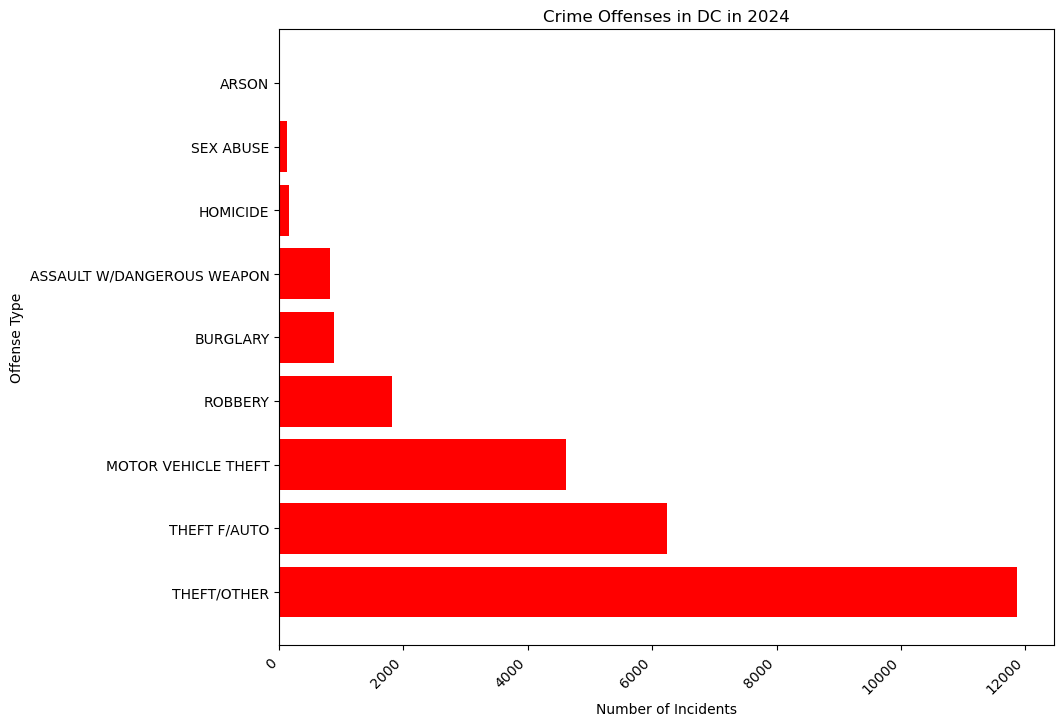

In [75]:
# looking at different types of offenses
plt.figure(figsize = (10, 8))
plt.barh(crime['offense'].value_counts().index, crime['offense'].value_counts().values, color='red')
plt.ylabel("Offense Type")
plt.xlabel("Number of Incidents")
plt.title("Crime Offenses in DC in 2024")
plt.xticks(rotation=45, ha="right") 
plt.show()

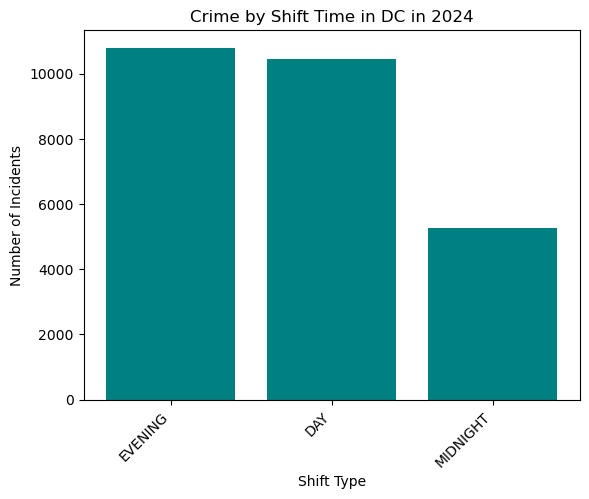

In [73]:
# looking at crimes for different shifts
plt.bar(crime['shift'].value_counts().index, crime['shift'].value_counts().values, color='teal')
plt.xlabel("Shift Type")
plt.ylabel("Number of Incidents")
plt.title("Crime by Shift Time in DC in 2024")
plt.xticks(rotation=45, ha="right") 
plt.show()